# SVM Lab

In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
# Evaluation metrics related methods
from sklearn.metrics import (classification_report, 
                             accuracy_score, 
                             f1_score, 
                             confusion_matrix, 
                             precision_recall_fscore_support, 
                             precision_score, 
                             recall_score)

import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
%matplotlib inline

We'll use the same dataset from the logistic regression lab, with a few modifications on the target variable.

The data has the following properties:

- There are 18 columns (17 feature columns, 1 target column)
- All feature columns are numeric (10 float and 7 integer)
- The target column is an **integer which corresponds to ['More Often', 'Less Often']**
- There are a total of 13260 food items listed.
- The distribution of categories is *not* equivalent across classes
- The data is not scaled/normalised.

In [2]:
df = pd.read_csv("./data/food_items_binary.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7639 entries, 0 to 7638
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Calories             7639 non-null   float64
 1   Total Fat            7639 non-null   int64  
 2   Saturated Fat        7639 non-null   float64
 3   Monounsaturated Fat  7639 non-null   float64
 4   Polyunsaturated Fat  7639 non-null   float64
 5   Trans Fat            7639 non-null   float64
 6   Cholesterol          7639 non-null   int64  
 7   Sodium               7639 non-null   float64
 8   Total Carbohydrate   7639 non-null   float64
 9   Dietary Fiber        7639 non-null   float64
 10  Sugars               7639 non-null   float64
 11  Sugar Alcohol        7639 non-null   int64  
 12  Protein              7639 non-null   float64
 13  Vitamin A            7639 non-null   int64  
 14  Vitamin C            7639 non-null   int64  
 15  Calcium              7639 non-null   i

In [3]:
target_variable = 'class'

X = df.drop(columns=[target_variable])
y = df[target_variable]

In [4]:
X.describe().T.drop(columns=['count', '25%', '75%'])

,mean,std,min,50%,max
Calories,105.098835,77.224368,0.0,100.0,2210.0
Total Fat,2.318235,3.438941,0.0,1.0,24.0
Saturated Fat,0.368920,0.737164,0.0,0.0,8.0
Monounsaturated Fat,0.309216,1.310260,0.0,0.0,16.8
Polyunsaturated Fat,0.264116,2.848250,0.0,0.0,235.0
Trans Fat,0.007069,0.094783,0.0,0.0,2.5
Cholesterol,4.308679,14.788162,0.0,0.0,450.0
Sodium,235.053659,252.438163,0.0,150.0,2220.0
Total Carbohydrate,15.510719,14.028570,0.0,13.0,270.0
Dietary Fiber,1.806074,4.099947,0.0,1.0,305.0


In [5]:
y.value_counts(normalize=True)

class
0    0.870402
1    0.129598
Name: proportion, dtype: float64

<Axes: xlabel='class'>

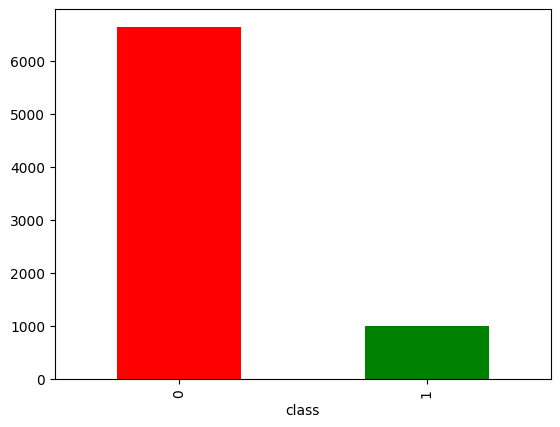

In [6]:
y.value_counts().plot.bar(color=['red', 'green'])

## Building the model with default parameters

First we split up the data as usual, then fit a model using the default parameters. This model already achieves decent performance with an accuracy of 95%, and an f1 score of 0.82.

In [7]:
def evaluate_metrics(yt, yp):
    results_pos = {}
    results_pos['accuracy'] = accuracy_score(yt, yp)
    precision, recall, f_beta, _ = precision_recall_fscore_support(yt, yp, average='binary')
    results_pos['recall'] = recall
    results_pos['precision'] = precision
    results_pos['f1score'] = f_beta
    return results_pos

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    stratify=y, 
    random_state = 123)

In [9]:
model = SVC()
model.fit(X_train, y_train)
preds = model.predict(X_test)
evaluate_metrics(y_test, preds)

{'accuracy': 0.9568062827225131,
 'recall': 0.7727272727272727,
 'precision': 0.8793103448275862,
 'f1score': 0.8225806451612904}

## Customizing performance

There are still a lot of choices we can make beyond the default settings. For example:
- Regularization parameter `C`
- Choice of kernel

Here we will explore which of these will perform best.

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

pipe = Pipeline(steps=[
    ('SCALER', MinMaxScaler()),
    ('SVC', SVC())
])

params = {
    'SVC__kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'SVC__C': [0.1, 1, 10, 100]
    }

gs = GridSearchCV(
    estimator=pipe, 
    param_grid=params, 
    scoring='f1',
    cv=5,
    verbose=2
    )
gs.fit(X_train, y_train)
gs.best_estimator_

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .....................SVC__C=0.1, SVC__kernel=linear; total time=   0.0s
[CV] END .....................SVC__C=0.1, SVC__kernel=linear; total time=   0.0s
[CV] END .....................SVC__C=0.1, SVC__kernel=linear; total time=   0.0s
[CV] END .....................SVC__C=0.1, SVC__kernel=linear; total time=   0.0s
[CV] END .....................SVC__C=0.1, SVC__kernel=linear; total time=   0.0s
[CV] END ........................SVC__C=0.1, SVC__kernel=rbf; total time=   0.0s
[CV] END ........................SVC__C=0.1, SVC__kernel=rbf; total time=   0.0s
[CV] END ........................SVC__C=0.1, SVC__kernel=rbf; total time=   0.0s
[CV] END ........................SVC__C=0.1, SVC__kernel=rbf; total time=   0.0s
[CV] END ........................SVC__C=0.1, SVC__kernel=rbf; total time=   0.0s
[CV] END .......................SVC__C=0.1, SVC__kernel=poly; total time=   0.0s
[CV] END .......................SVC__C=0.1, SVC_

,steps,"[('SCALER', ...), ('SVC', ...)]"
,transform_input,None
,memory,None
,verbose,False
,feature_range,"(0, ...)"
,copy,True
,clip,False
,C,100
,kernel,'rbf'
,degree,3
,gamma,'scale'


In [32]:
gs.best_params_

{'SVC__C': 100, 'SVC__kernel': 'rbf'}

Thanks to grid search we now know that [] are the parameters leading to the best performance. We can easily train a new model with these parameters and evaluate the total performance.

In [33]:
model = gs.best_estimator_
model.fit(X_train, y_train)
preds = model.predict(X_test)
evaluate_metrics(y_test, preds)

{'accuracy': 0.9770942408376964,
 'recall': 0.9393939393939394,
 'precision': 0.8899521531100478,
 'f1score': 0.914004914004914}

## Plotting the hyperplane and margin

With our trained model, we would now like to have some insight into how it actually looks. For this we can plot the hyperplane in the 2D projection of two of the features. For this we will use 'Calories' and 'Dietary Fiber'.

In [15]:
def plot_decision_boundary(X, y, model):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)

    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(
        XX, YY, Z, colors="k", levels=[-1, 0, 1], alpha=0.5, linestyles=["--", "-", "--"]
    )

    # plot support vectors
    ax.scatter(
        model.support_vectors_[:, 0],
        model.support_vectors_[:, 1],
        s=100,
        linewidth=1,
        facecolors="none",
        edgecolors="k",
    )
    plt.show()

In [20]:
hyperplane_subset = ['Calories', 'Dietary Fiber']

X = df[hyperplane_subset][:1000]
y = df[target_variable][:1000]

under_sampler = RandomUnderSampler(random_state=123)
X_under, y_under = under_sampler.fit_resample(X, y)

mms = MinMaxScaler()
X_under = mms.fit_transform(X_under)

print(f"Dataset resampled shape, X: {X_under.shape}, y: {y_under.shape}")

Dataset resampled shape, X: (62, 2), y: (62,)


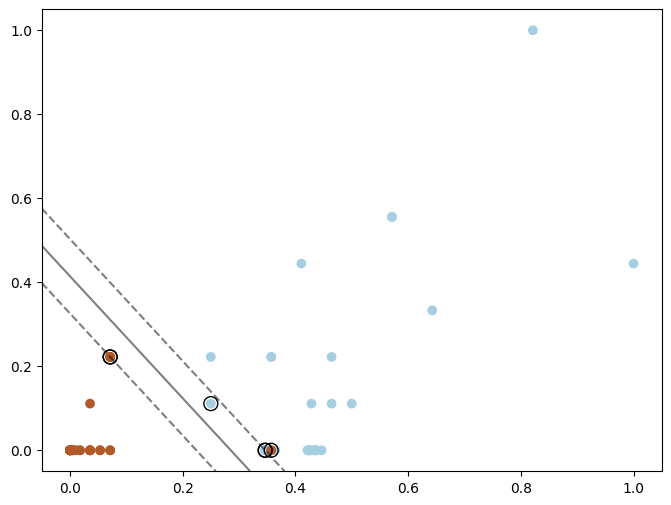

In [21]:
linear_svm = SVC(C=1000, kernel='linear')
linear_svm.fit(X_under, y_under)

plot_decision_boundary(X_under, y_under, linear_svm)

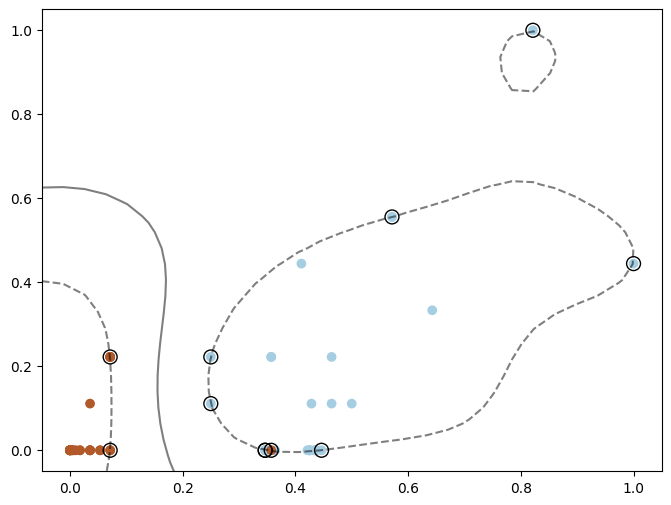

In [30]:
svm_rbf_kernel = SVC(C=100, kernel='rbf')
svm_rbf_kernel.fit(X_under, y_under)

plot_decision_boundary(X_under, y_under, svm_rbf_kernel)